In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

df1= pd.read_csv("heart_disease.csv", names=col_names, header=None, na_values="?")

print("Records: {}\nVariables: {}".format(df1.shape[0], df1.shape[1]))

df1.head()

Records: 303
Variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   blood_pressure        303 non-null    float64
 4   serum_cholestoral     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   electrocardiographic  303 non-null    float64
 7   max_heart_rate        303 non-null    float64
 8   induced_angina        303 non-null    float64
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    float64
 11  no_of_vessels         299 non-null    float64
 12  thal                  301 non-null    float64
 13  diagnosis             303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
df1.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

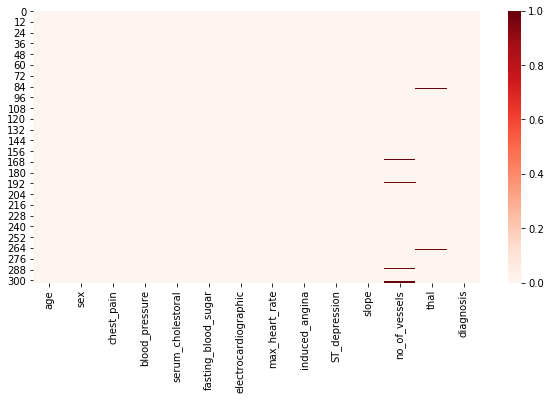

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.isnull(),cmap="Reds")
plt.show()

# So basis Info and null analysis its clear that no_of_vessels and thal feature contains null values

Analysing categorical and numerical features seperately

In [7]:
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df1.columns if c not in numeric_columns]
print(categorical_columns)


['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


In [8]:
df1[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


In [9]:
df1.corr()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
chest_pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
blood_pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
serum_cholestoral,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fasting_blood_sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
electrocardiographic,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
max_heart_rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
induced_angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
ST_depression,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


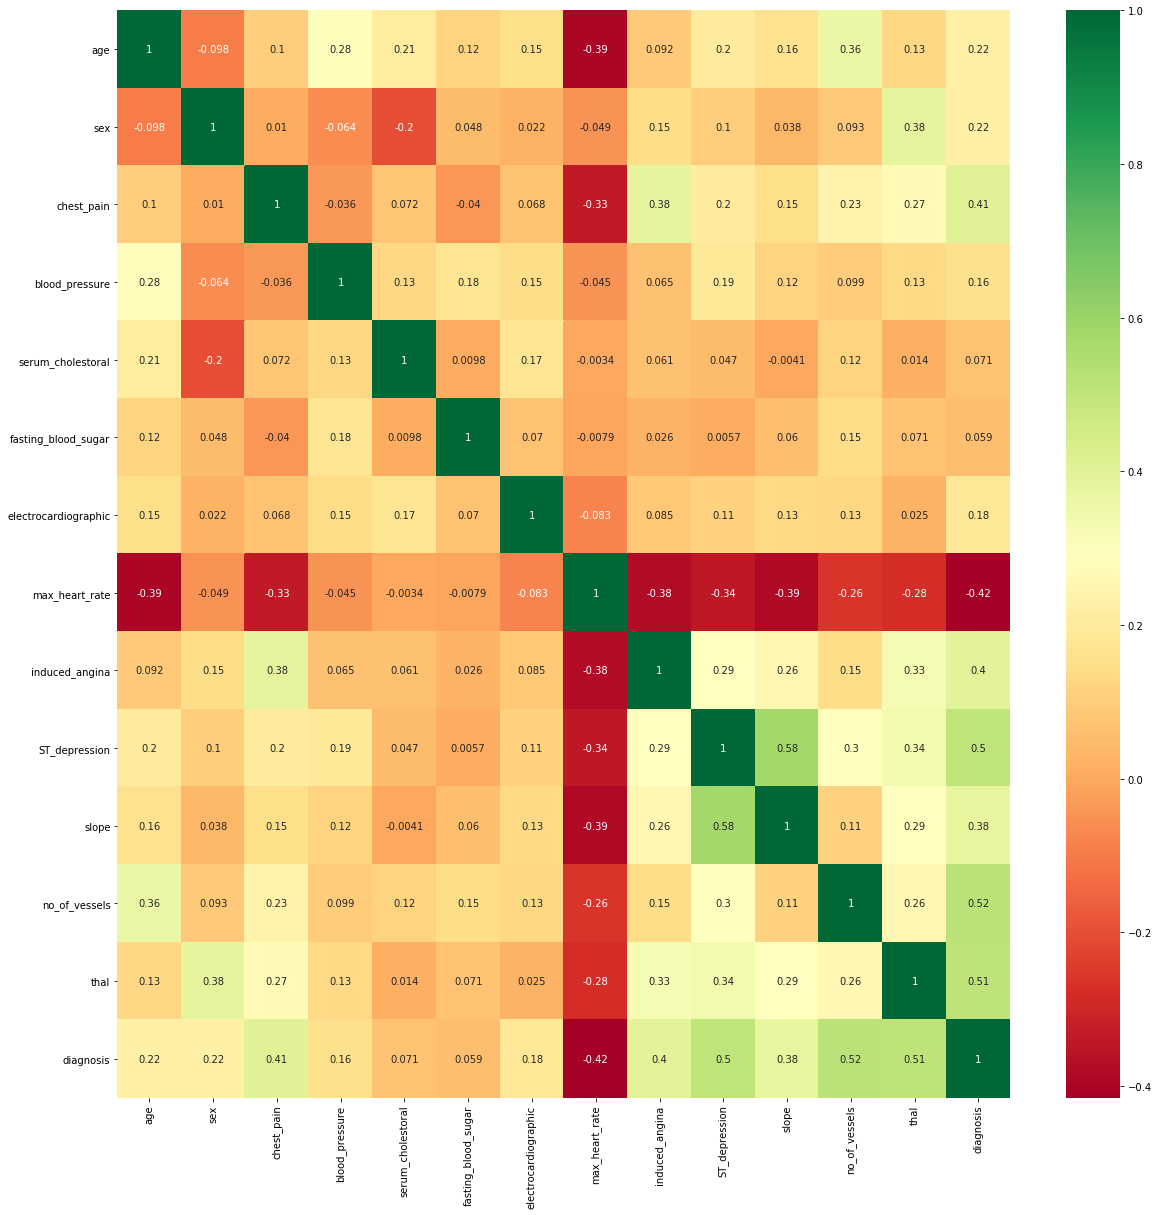

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cmap="RdYlGn",annot=True)
plt.show()

In [11]:
df1.skew()

age                    -0.209060
sex                    -0.774935
chest_pain             -0.841754
blood_pressure          0.706035
serum_cholestoral       1.135503
fasting_blood_sugar     1.986652
electrocardiographic    0.019900
max_heart_rate         -0.537449
induced_angina          0.742532
ST_depression           1.269720
slope                   0.508316
no_of_vessels           1.189352
thal                    0.244447
diagnosis               1.058496
dtype: float64

Summary:
Primary findings

a) No.of vessels and thal have null values

b)Some outliers are present

c)Serum_cholestoral,fasting_blood_sugar,ST_depression,no.of vessels are positively skewed


# DATA Analysis & Visualisation

In [15]:
df1.diagnosis = (df1.diagnosis != 0).astype(int)
df1.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

In [16]:
df1.groupby(["sex","diagnosis"])["diagnosis"].count() # As described in the dataset description 1 =male , 0=female

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

In [17]:
df1["diagnosis"].value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

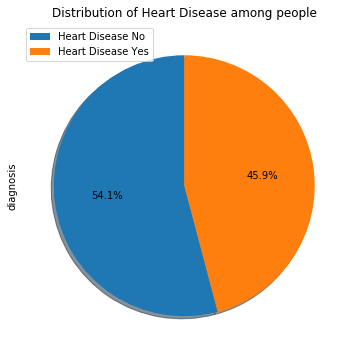

In [18]:
labels= 'Heart Disease No','Heart Disease Yes'
df1['diagnosis'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Heart Disease among people')
plt.legend(labels=labels, loc='upper left') 
plt.show()

Its clear that 45.9 % people are prone to heart disease

Replace null values from thal and no. of vessels

In [19]:
df1[df1["thal"].isnull()]

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1


In [20]:
df1["thal"].fillna(df1["thal"].mode().iloc[0],inplace=True)

In [21]:
df1["thal"].isnull().value_counts() # Removed the null values basis most frequent occuring value as it is a categorical numerical

False    303
Name: thal, dtype: int64

In [22]:
df1[df1["no_of_vessels"].isnull()]

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [23]:
df1["no_of_vessels"].mode().iloc[0]

0.0

In [24]:
df1["no_of_vessels"].unique()

array([ 0.,  3.,  2.,  1., nan])

In [25]:
df1["no_of_vessels"].fillna(df1["no_of_vessels"].mode().iloc[0],inplace=True)

In [26]:
df1["no_of_vessels"].isnull().value_counts()

False    303
Name: no_of_vessels, dtype: int64

# Visualising categorical features impact on heart disease

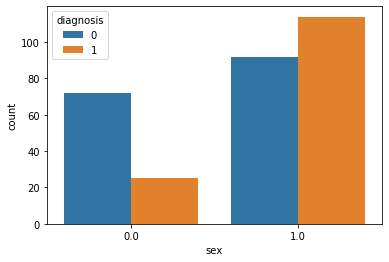

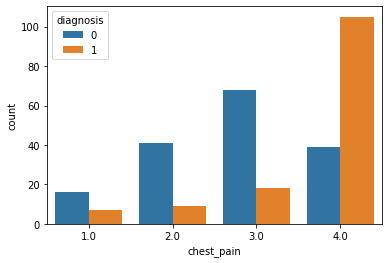

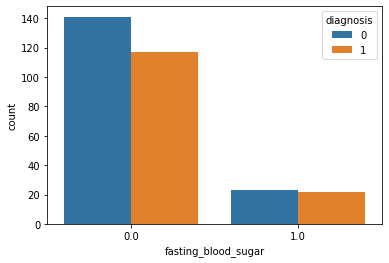

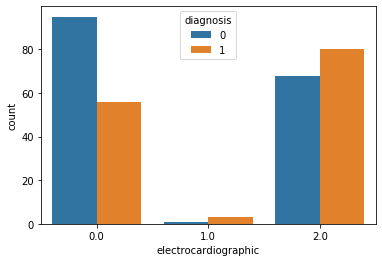

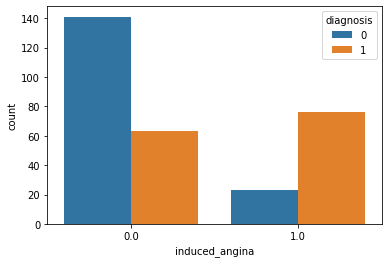

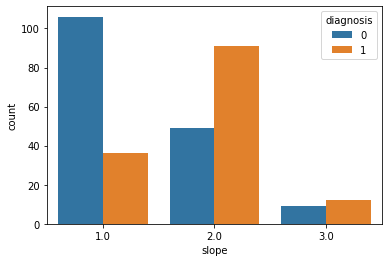

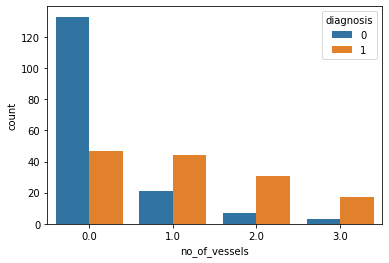

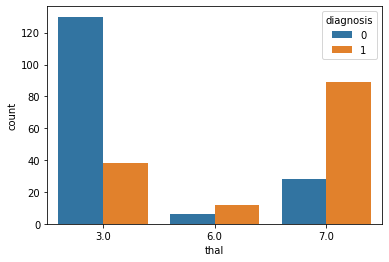

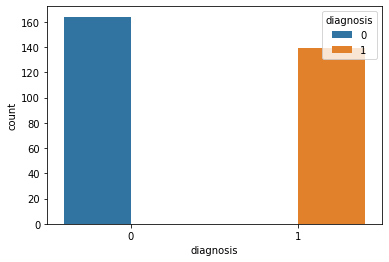

In [27]:
for i in categorical_columns :
    sns.countplot(x=i, hue="diagnosis", data=df1,)
    plt.show()

# Visualising numerical features distribution

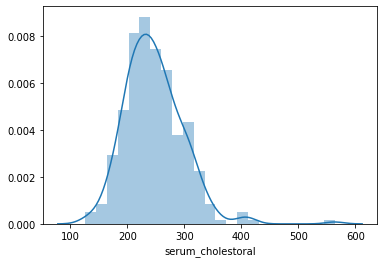

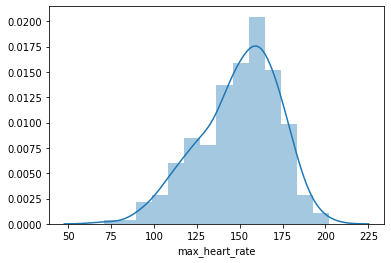

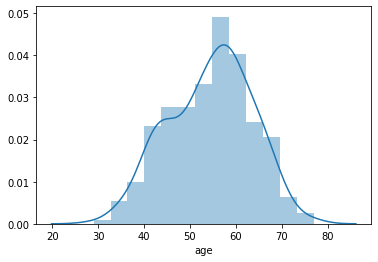

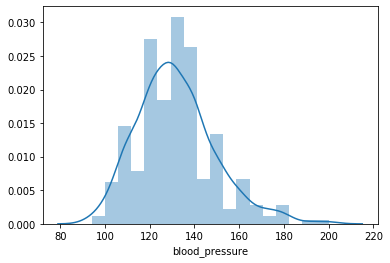

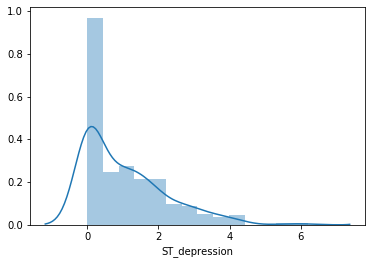

In [28]:
for i in numeric_columns:
    sns.distplot(df1[i])
    plt.show()

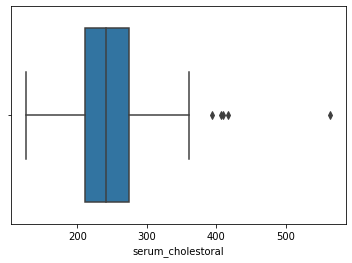

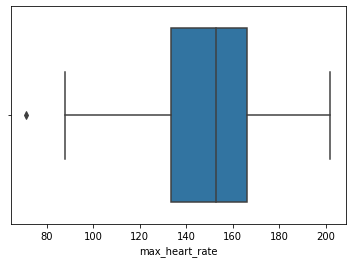

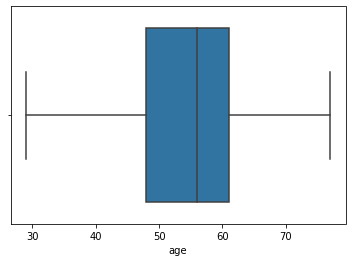

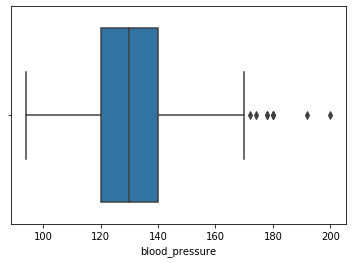

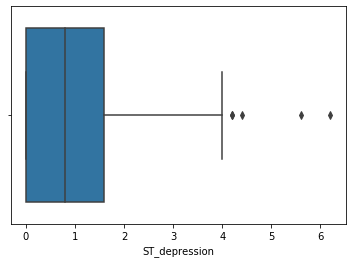

In [29]:
for i in numeric_columns:
    sns.boxplot(x=df1[i])
    plt.show()

Summary: Secondary findings

a) 45.9% People are prone to heart disease

b) Males are having higher chances of heart diseases

c) Reversible defect has higher chances of heart disease

d) outlier present in cholestrol, st depression and blood pressure

In [32]:
df1.shape

(303, 14)

# Model Building


In [33]:
x=df1.drop(columns=["diagnosis"])
y=df1[["diagnosis"]]

In [34]:
print(x.shape)
print(y.shape)

(303, 13)
(303, 1)


In [35]:
scale=StandardScaler()
x=scale.fit_transform(x) # Scalling the data

# Logistic Regression

In [40]:
import warnings
warnings.filterwarnings("ignore")
max_accuracy=0
for r_state in range(0,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print("max  r2 corresponding r_state",r_state,"is",accuracy)     
    if accuracy > max_accuracy:
        max_accuracy=accuracy
        final_state=r_state
print()
print()
   

max  r2 corresponding r_state 0 is 0.7868852459016393
max  r2 corresponding r_state 1 is 0.8360655737704918
max  r2 corresponding r_state 2 is 0.7868852459016393
max  r2 corresponding r_state 3 is 0.8524590163934426
max  r2 corresponding r_state 4 is 0.8360655737704918
max  r2 corresponding r_state 5 is 0.8688524590163934
max  r2 corresponding r_state 6 is 0.8360655737704918
max  r2 corresponding r_state 7 is 0.819672131147541
max  r2 corresponding r_state 8 is 0.8032786885245902
max  r2 corresponding r_state 9 is 0.7868852459016393
max  r2 corresponding r_state 10 is 0.8360655737704918
max  r2 corresponding r_state 11 is 0.8032786885245902
max  r2 corresponding r_state 12 is 0.7704918032786885
max  r2 corresponding r_state 13 is 0.8360655737704918
max  r2 corresponding r_state 14 is 0.819672131147541
max  r2 corresponding r_state 15 is 0.819672131147541
max  r2 corresponding r_state 16 is 0.8360655737704918
max  r2 corresponding r_state 17 is 0.8032786885245902
max  r2 corresponding r

In [42]:
#Max accuracy score is at 98
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=0.20)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9344262295081968


In [43]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[38  2]
 [ 2 19]]


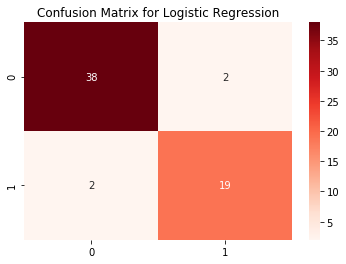

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="Reds",annot=True)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.90      0.90      0.90        21

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [47]:

from sklearn.ensemble import RandomForestClassifier

In [49]:
max_accuracy = 0
for i in range(101):
    rf = RandomForestClassifier(random_state=i)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_test,y_pred_rf)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

96.72
[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.71113139
   0.66000414]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.5048807
  -0.89023814]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.43287667
   1.17675157]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.36087264
   1.17675157]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.36087264
  -0.89023814]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214 -0.71113139
  -0.89023814]]


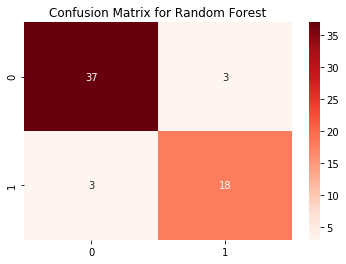

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),cmap="Reds",annot=True)
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [51]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.86      0.86      0.86        21

    accuracy                           0.90        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61



# Clearly we can see Logistic Regression is a better model for predicting heart disease